# 11 ODE Applications (Projectile with linear air resistance)
Let's apply our ODE solvers to some problems involving balls and projectiles. We will start with projectile motion with linear air resistances.

The `integrators.py` file from the lesson on [ODE integrators](https://py4phy.github.io/PHY432/modules/ODEs/integrators/) is used here (and named [`ode.py`](https://github.com/Py4Phy/PHY432-resources/blob/main/11_ODE_applications/ode.py)).


In [1]:
import numpy as np
import ode

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')

## Theory
Linear drag force

$$
\mathbf{F}_1 = -b_1 \mathbf{v}
$$

Equations of motion with force due to gravity $\mathbf{g} = -g \hat{\mathbf{e}}_y$

\begin{align}
\frac{d\mathbf{r}}{dt} &= \mathbf{v}\\
\frac{d\mathbf{v}}{dt} &= - g \hat{\mathbf{e}}_y -\frac{b_1}{m} \mathbf{v} 
\end{align}

Bring into standard ODE form for

$$
\frac{d\mathbf{y}}{dt} = \mathbf{f}(t, \mathbf{y})
$$

as

$$
\mathbf{y} = \begin{pmatrix}
x\\
y\\
v_x\\
v_y
\end{pmatrix}, \quad
\mathbf{f} = \begin{pmatrix}
v_x\\
v_y\\
-\frac{b_1}{m} v_x\\
-g -\frac{b_1}{m} v_y
\end{pmatrix}
$$

(Based on Wang 2016, Ch 3.3.1)

## Python implementation with ODE solver

- Formulate the function `f()` for the standard ODE form (note: velocity dependence)
- Set up the integration loop: 
  - only integrate until the particle hits ground, i.e. while $y ≥ 0$.
  - choose an appropriate ODE solver from `ode.py` such as RK4 (because there's no energy conservation so velocity Verlet is not as useful)

In [3]:
def simulate(v0, h=0.01, b1=0.2, g=9.81, m=0.5):
    
    def f(t, y):
        # y = [x, y, vx, vy]
        return np.array([y[2], y[3], -b1/m * y[2], -g - b1/m * y[3]])

    vx, vy = v0
    t = 0
    positions = []
    y = np.array([0, 0, vx, vy], dtype=np.float64)
    
    while y[1] >= 0:
        positions.append([t, y[0], y[1]])  # record t, x and y
        y[:] = ode.rk4(y, f, t, h)
        t += h
        
    return np.array(positions)

def initial_v(v, theta):
    x = np.deg2rad(theta)
    return v * np.array([np.cos(x), np.sin(x)])

### Launch at fixed angle

In [4]:
r = simulate(initial_v(200, 30), h=0.01, b1=1)

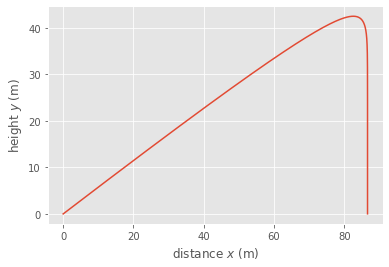

In [5]:
plt.plot(r[:, 1], r[:, 2])
plt.xlabel(r"distance $x$ (m)")
plt.ylabel(r"height $y$ (m)");

### Distance depends on launch angle 

Plot the trajectory for launch angles from 5º to 45º.

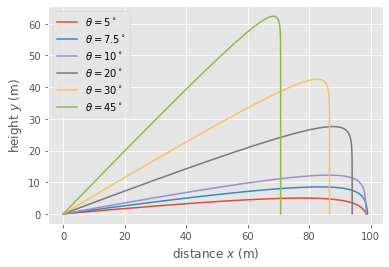

In [8]:
for angle in (5, 7.5, 10, 20, 30, 45):
    r = simulate(initial_v(200, angle), h=0.01, b1=1)
    plt.plot(r[:, 1], r[:, 2], label=r"$\theta = {}^\circ$".format(angle))
plt.legend(loc="best")
plt.xlabel(r"distance $x$ (m)")
plt.ylabel(r"height $y$ (m)");
plt.savefig("launch_linear_air_resistance.svg")